# Penn model

We have one implementation of the Penn model so far, we need to discuss the metrics however, or specifically how we estimate the infected population. (I in SIR). 

In [1]:
from comodels.sir import Penn_detect_prob
import matplotlib.pyplot as plt
print(Penn_detect_prob.__doc__)


    Penn_detect_prob:
        Make SIR predictions given the assumed detection rate (out of all infected cases), using
        the parameter estimation method from the Penn model.
    ----------------------------------------------------------------------
    Parameters:
        S: pop size, Number of people affected
        I: infected, Number of positive tests in region
        R: recovered, number of recoveries
        detect_prob: percentage of all infected cases in region which you believe are being detected
        hosp_rate: rate of infected admitted to the hospital = 0.05
        icu_rate: rate of infected who need to be in ICU = 0.02
        vent_rate: rate of infected who need ventilators = 0.01
        contact_reduction: percent contact reduced by social distancing = 0
        t_double: time to double number of infected = 6.
        beta_decay: decay rate of beta, which represents how often a contact results in a new infection = 0
        vent_los: time one patient takes up 

Documentation will be improved :). Lets set up two scenarios: First, one where we have identified 1 out of every 8 COVID positive people in Texas, and the same scenario with social distancing:

In [2]:
tx = Penn_detect_prob(28304596, 223, 0, 1/8)
tx_good = Penn_detect_prob(28304596, 223, 0, 1/8, contact_reduction = 0.33)

In [3]:
tx_curve, tx_admissions = tx.sir(180)
tx_distant_curve, tx_distant_admissions = tx_good.sir(180)

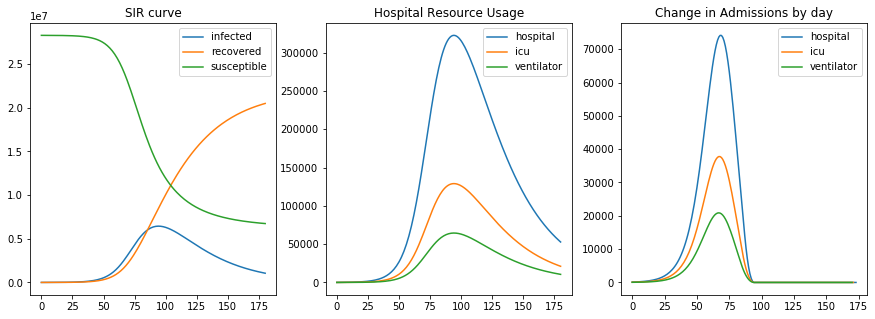

In [4]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
for k, v in tx_curve.items():
    if k not in tx.rates.keys():
        ax[0].plot(v, label=k)
        ax[0].legend()

    else:
        ax[1].plot(v, label=k)
        ax[1].legend()
ax[1].set_title('Hospital Resource Usage')
ax[0].set_title('SIR curve')
for k, v in tx_admissions.items():
    ax[2].plot(v, label = k)
    ax[2].legend()
_ = ax[2].set_title('Change in Admissions by day')
    

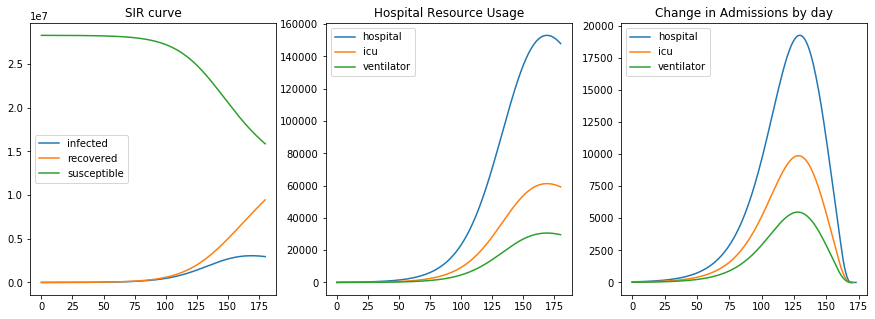

In [5]:
def plot_penn(Pdp: Penn_detect_prob, n_days: int) -> None:
    curve, admissions = Pdp.sir(n_days)
    fig, ax = plt.subplots(1,3, figsize=(15,5))
    for k, v in curve.items():
        if k not in tx.rates.keys():
            ax[0].plot(v, label=k)
            ax[0].legend()
        else:
            ax[1].plot(v, label=k)
            ax[1].legend()
    ax[1].set_title('Hospital Resource Usage')
    ax[0].set_title('SIR curve')
    for k, v in admissions.items():
        ax[2].plot(v, label = k)
        ax[2].legend()
    ax[2].set_title('Change in Admissions by day')
    plt.show()
    
plot_penn(tx_good, 180)
    